In [3]:
# required modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import geopandas as gpd
import plotly.express as px

In [5]:
df_rest = pd.read_csv('../data/data_combined_v1.02.csv')
df_rest.head()

,place_id,tripadvisor_id,fsq_id,name,business_status,types,price_level,ta_price_level,price_level_combined,rating,...,population_20_24,population_25_34,population_35_44,population_45_54,population_54_64,population_65+,resident_per_km2,brut_income_annual_per_person,cluster,district
0,ChIJd6kh67ZkjEcRC1IQourQOyo,7159041.0,4de685281f6e9d90c7f5325c,Restaurant La Tentation,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",2.0,2.0,3.0,4.2,...,1937,5163,5549,4924,4290,5625,16282,109266,2,Saint-Jean Charmilles
1,ChIJX68uubZkjEcRKKxpZ7OrgqU,13322506.0,NaN,Café Restaurant Palma,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,NaN,4.0,3.7,...,1937,5163,5549,4924,4290,5625,16282,109266,2,Saint-Jean Charmilles
2,ChIJPcYsG_BljEcR4kTFqBJJoK4,6720272.0,NaN,Le Versailles,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,2.0,3.0,3.9,...,1937,5163,5549,4924,4290,5625,16282,109266,2,Saint-Jean Charmilles
3,ChIJV8uySFxljEcRn7XpIO3zZX0,NaN,NaN,Restaurant Les Jardins du Rhône,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,NaN,...,1937,5163,5549,4924,4290,5625,16282,109266,2,Saint-Jean Charmilles
4,ChIJW8zU8rZkjEcR_Ke8t7c7hVc,NaN,NaN,Canteen De La Residence Gardens Du Rhône,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,4.0,5.0,...,1937,5163,5549,4924,4290,5625,16282,109266,2,Saint-Jean Charmilles


In [55]:
df_rest['district'].value_counts()

Cité-Centre                277
Pâquis Sécheron            260
Grottes Saint-Gervais      252
Jonction - Plainpalais     200
Eaux-Vives - Lac           188
La Cluse - Philosophes     139
Saint-Jean Charmilles       92
Servette Petit-Saconnex     57
Champel                     55
Bâtie - Acacias             49
Name: district, dtype: int64

In [5]:
list_district = df_rest['district'].unique().tolist()
list_district

['Saint-Jean Charmilles',
 'Bâtie - Acacias',
 'Servette Petit-Saconnex',
 'Jonction - Plainpalais',
 'Eaux-Vives - Lac',
 'Grottes Saint-Gervais',
 'Pâquis Sécheron',
 'La Cluse - Philosophes',
 'Cité-Centre',
 'Champel']

Intertia Analysis for District: Saint-Jean Charmilles


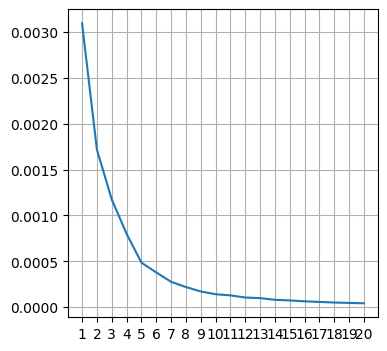

Intertia Analysis for District: Bâtie - Acacias


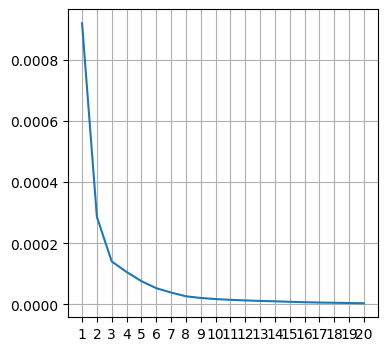

Intertia Analysis for District: Servette Petit-Saconnex


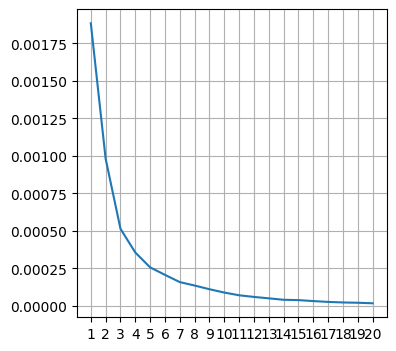

Intertia Analysis for District: Jonction - Plainpalais


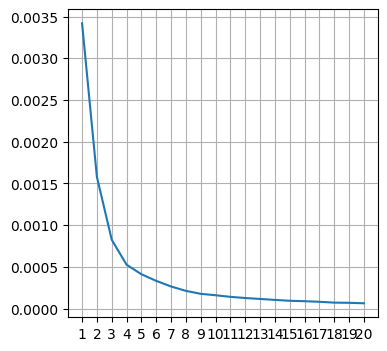

Intertia Analysis for District: Eaux-Vives - Lac


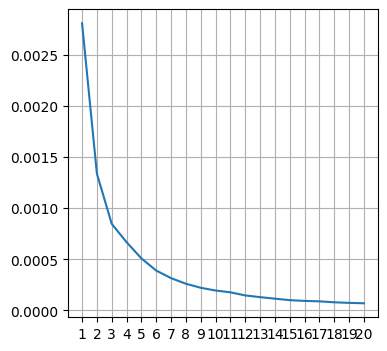

Intertia Analysis for District: Grottes Saint-Gervais


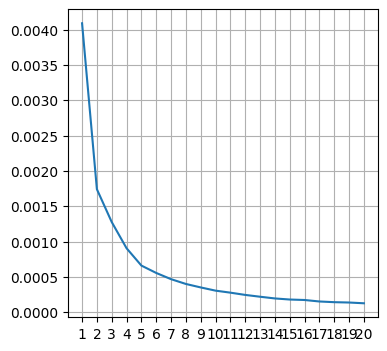

Intertia Analysis for District: Pâquis Sécheron


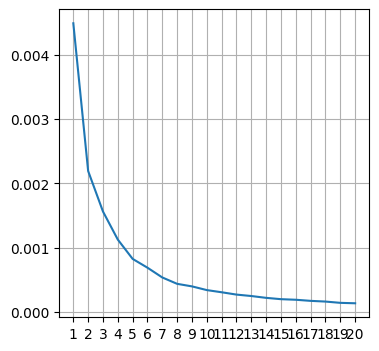

Intertia Analysis for District: La Cluse - Philosophes


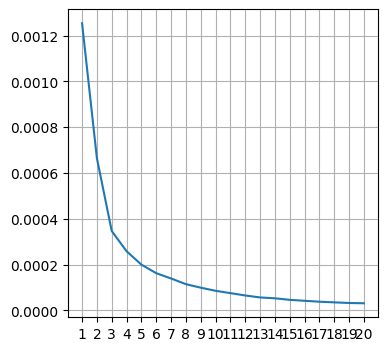

Intertia Analysis for District: Cité-Centre


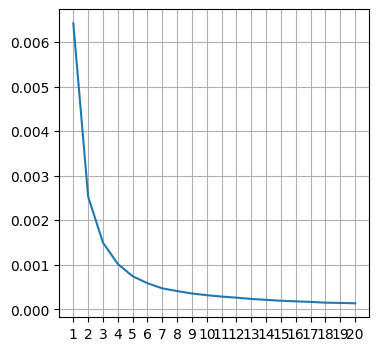

Intertia Analysis for District: Champel


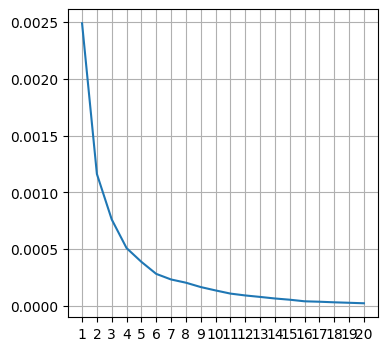

In [56]:
clusters = list(range(1, 21))
random_state = 42

for district in list_district:
    wcss = [] #within-cluster sum of square
    X = df_rest[df_rest['district']==district][['geometry.location.lat', 'geometry.location.lng']]
    
    for cluster in clusters:
        intertia = KMeans(n_clusters=cluster, random_state=random_state).fit(X).inertia_
        wcss.append(intertia)
        
    print(f'Intertia Analysis for District: {district}')
    #plot
    plt.figure(figsize=(4,4))
    plt.plot(clusters, wcss)
    plt.xticks(clusters)
    plt.grid(True)
    plt.show()

In [58]:
dict_kvals = {
    'Saint-Jean Charmilles':5,
    'Bâtie - Acacias':3,
    'Servette Petit-Saconnex':3,
    'Jonction - Plainpalais':4,
    'Eaux-Vives - Lac':5,
    'Grottes Saint-Gervais':5,
    'Pâquis Sécheron':5,
    'La Cluse - Philosophes':5,
    'Cité-Centre':4,
    'Champel':4}

In [100]:
df_rest['district_area'] = np.nan
df_rest['district_area']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1564   NaN
1565   NaN
1566   NaN
1567   NaN
1568   NaN
Name: district_area, Length: 1569, dtype: float64

In [181]:
random_state = 42
district_area = 1
cluster_centers = pd.DataFrame()
df_tmp = df_rest
for district in list_district:
    k = dict_kvals[district]
    X = df_rest[df_rest['district']==district][['geometry.location.lat', 'geometry.location.lng']]
    
    km_model = KMeans(n_clusters=k, random_state=random_state)
    km_model.fit(X)
    
    tmp_cluster_centers = pd.DataFrame({'district_area':np.unique(km_model.labels_ + district_area),
                               'cluster_center_lat':km_model.cluster_centers_[:,0],
                               'cluster_center_lng':km_model.cluster_centers_[:,1]})
    cluster_centers = pd.concat([cluster_centers, tmp_cluster_centers],
                            axis=0).reset_index(drop=True)
    
    df_rest['district_area'][df_rest['district']==district] = km_model.labels_ + district_area

    district_area += max(km_model.labels_) + 1

/var/folders/rh/zwlpfnnn73lgx2bmpgbl63480000gn/T/ipykernel_77910/1286206218.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rh/zwlpfnnn73lgx2bmpgbl63480000gn/T/ipykernel_77910/1286206218.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rh/zwlpfnnn73lgx2bmpgbl63480000gn/T/ipykernel_77910/1286206218.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rh/zwlpfnnn73lgx2bmpgbl63480000gn/T/ipy

In [153]:
np.sort(df_rest['district_area'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43.])

In [182]:
cluster_centers

,district_area,cluster_center_lat,cluster_center_lng
0,1,46.212100,6.131209
1,2,46.207155,6.123776
2,3,46.206174,6.115011
3,4,46.205909,6.129978
4,5,46.213205,6.124719
5,6,46.190964,6.137877
6,7,46.190460,6.130733
7,8,46.199709,6.122375
8,9,46.222885,6.127898
9,10,46.219508,6.137469


In [192]:
df_rest['district_cluster'] = df_rest['district_area'].astype(int)

In [175]:
np.sort(df_rest['distrit_area'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43])

In [193]:
px.set_mapbox_access_token(open("../.env/.mapbox_access_token").read())

fig = px.scatter_mapbox(df_rest, lat="geometry.location.lat", 
                        lon="geometry.location.lng", 
                        color="district_cluster",
                        opacity=0.5,
                        center={'lat':46.2043907,'lon':6.1431577},
                        width=800,
                        height=600,
                        zoom=12)
fig.show()

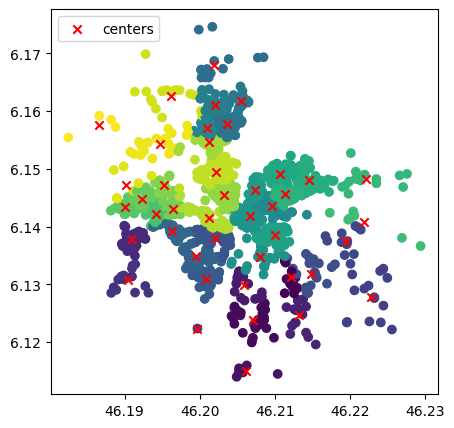

In [194]:
plt.figure(figsize=(5,5))
plt.scatter(df_rest["geometry.location.lat"],df_rest["geometry.location.lng"], c=df_rest["district_cluster"])
plt.scatter(cluster_centers['cluster_center_lat'],cluster_centers['cluster_center_lng'], c='r', marker='x', label='centers')
#plt.scatter(rest_grid_points[max_indices][:,0],rest_grid_points[max_indices][:,1],c='black')
plt.legend(loc='upper left')
plt.show()

In [196]:
df_rest.drop(columns=['cluster','distrit_area','district_area'], inplace=True)

In [198]:
df_rest.to_csv('../data/data_combined_v1.03.csv', encoding='utf-8-sig', index=False)

In [199]:
cluster_centers.to_csv('../data/data_cluster_centers.csv', encoding='utf-8-sig', index=False)

# Revised clustering (Sep-8)

In [89]:
df_rest_dist2 = pd.read_csv('../data/data_combined_v1.03.csv')
df_rest_dist2 = df_rest_dist2[df_rest_dist2['district_cluster'] != 8].drop(columns='district_cluster')
df_rest_dist2.head()

,place_id,tripadvisor_id,fsq_id,name,business_status,types,price_level,ta_price_level,price_level_combined,rating,...,population_15_19,population_20_24,population_25_34,population_35_44,population_45_54,population_54_64,population_65+,resident_per_km2,brut_income_annual_per_person,district
0,ChIJd6kh67ZkjEcRC1IQourQOyo,7159041.0,4de685281f6e9d90c7f5325c,Restaurant La Tentation,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",2.0,2.0,3.0,4.2,...,1547,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles
1,ChIJX68uubZkjEcRKKxpZ7OrgqU,13322506.0,NaN,Café Restaurant Palma,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,NaN,4.0,3.7,...,1547,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles
2,ChIJPcYsG_BljEcR4kTFqBJJoK4,6720272.0,NaN,Le Versailles,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,2.0,3.0,3.9,...,1547,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles
3,ChIJV8uySFxljEcRn7XpIO3zZX0,NaN,NaN,Restaurant Les Jardins du Rhône,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,NaN,...,1547,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles
4,ChIJW8zU8rZkjEcR_Ke8t7c7hVc,NaN,NaN,Canteen De La Residence Gardens Du Rhône,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,4.0,5.0,...,1547,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles


In [90]:
df_rest_dist2.columns

Index(['place_id', 'tripadvisor_id', 'fsq_id', 'name', 'business_status',
       'types', 'price_level', 'ta_price_level', 'price_level_combined',
       'rating', 'user_ratings_total', 'ta_rating', 'ta_user_ratings_total',
       'combined_rating', 'geometry.location.lat', 'geometry.location.lng',
       'formatted_address', 'zip_code', 'city', 'international_phone_number',
       'website', 'google_category', 'ta_4sq_cuisine1', 'ta_4sq_cuisine2',
       'ta_4sq_cuisine3', 'ta_4sq_cuisine4', 'ta_4sq_cuisine5',
       'main_category_1', 'main_category_2', 'main_category_3',
       'main_category_4', 'combined_main_category', 'sub_category',
       'neighboorhood_area_km2', 'resident_population_total',
       'population_age_0_14', 'population_15_19', 'population_20_24',
       'population_25_34', 'population_35_44', 'population_45_54',
       'population_54_64', 'population_65+', 'resident_per_km2',
       'brut_income_annual_per_person', 'district'],
      dtype='object')

In [91]:
# let's start with a baseline of 4 arbitrary, just by looking at the graph
X = df_rest_dist2\
    [df_rest_dist2['district']=='La Cluse - Philosophes']\
    [['geometry.location.lat','geometry.location.lng']]

random_state = 42 #important to have reproducable kmeans algorithm

# Instanciate the model
km_test = KMeans(n_clusters=4, random_state=random_state)

# fit kmeans on grid_points
km_test.fit(X)

# make a prediction
y_pred_test = pd.Series(km_test.labels_)
y_pred_test.value_counts()

2    44
3    34
0    33
1    28
dtype: int64

In [92]:
dict_kvals = {
    'Saint-Jean Charmilles':3, # from 5 to 3 more balanced
    'Bâtie - Acacias':3, # removed orphan
    'Servette Petit-Saconnex':3, #no change
    'Jonction - Plainpalais':4, # no change
    'Eaux-Vives - Lac':5, # no change
    'Grottes Saint-Gervais':5, # no change
    'Pâquis Sécheron':4, # changed from 5 to 4
    'La Cluse - Philosophes':4, # changed from 5 to 4
    'Cité-Centre':4, # no change
    'Champel':2} # better distributed from 4 to 2 in line with elbow

In [99]:
sum(dict_kvals.values())

37

In [94]:
list_district = df_rest_dist2['district'].unique().tolist()

random_state = 42
district_area = 1
cluster_centers = pd.DataFrame()
df_tmp = df_rest_dist2
df_rest_dist2['district_cluster'] = np.nan

for district in list_district:
    k = dict_kvals[district]
    X = df_rest_dist2[df_rest_dist2['district']==district][['geometry.location.lat', 'geometry.location.lng']]
    
    km_model = KMeans(n_clusters=k, random_state=random_state)
    km_model.fit(X)
    
    tmp_cluster_centers = pd.DataFrame({'district_area':np.unique(km_model.labels_ + district_area),
                               'cluster_center_lat':km_model.cluster_centers_[:,0],
                               'cluster_center_lng':km_model.cluster_centers_[:,1]})
    cluster_centers = pd.concat([cluster_centers, tmp_cluster_centers],
                            axis=0).reset_index(drop=True)
    
    df_rest_dist2['district_cluster'][df_rest_dist2['district']==district] = km_model.labels_ + district_area

    district_area += max(km_model.labels_) + 1

/var/folders/rh/zwlpfnnn73lgx2bmpgbl63480000gn/T/ipykernel_46676/4246377658.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rh/zwlpfnnn73lgx2bmpgbl63480000gn/T/ipykernel_46676/4246377658.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rh/zwlpfnnn73lgx2bmpgbl63480000gn/T/ipykernel_46676/4246377658.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rh/zwlpfnnn73lgx2bmpgbl63480000gn/T/ipy

In [95]:
df_rest_dist2['district_cluster'] = df_rest_dist2['district_cluster'].astype(int)
df_rest_dist2

,place_id,tripadvisor_id,fsq_id,name,business_status,types,price_level,ta_price_level,price_level_combined,rating,...,population_20_24,population_25_34,population_35_44,population_45_54,population_54_64,population_65+,resident_per_km2,brut_income_annual_per_person,district,district_cluster
0,ChIJd6kh67ZkjEcRC1IQourQOyo,7159041.0,4de685281f6e9d90c7f5325c,Restaurant La Tentation,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",2.0,2.0,3.0,4.2,...,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles,3
1,ChIJX68uubZkjEcRKKxpZ7OrgqU,13322506.0,NaN,Café Restaurant Palma,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,NaN,4.0,3.7,...,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles,3
2,ChIJPcYsG_BljEcR4kTFqBJJoK4,6720272.0,NaN,Le Versailles,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,2.0,3.0,3.9,...,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles,3
3,ChIJV8uySFxljEcRn7XpIO3zZX0,NaN,NaN,Restaurant Les Jardins du Rhône,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,NaN,...,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles,3
4,ChIJW8zU8rZkjEcR_Ke8t7c7hVc,NaN,NaN,Canteen De La Residence Gardens Du Rhône,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,4.0,5.0,...,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,ChIJtW8VekZljEcRHMTm4W0SQoo,23982683.0,NaN,Hôtel du Parc des Eaux-Vives,OPERATIONAL,"['restaurant', 'lodging', 'point_of_interest',...",3.0,NaN,4.0,4.4,...,996,3839,3699,3048,2638,3503,15694,132730,Eaux-Vives - Lac,14
1565,ChIJ8xcfO5JljEcRMsNfQ7YjlqM,23357178.0,NaN,La Terrasse du Parc,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,3.0,4.0,3.0,...,996,3839,3699,3048,2638,3503,15694,132730,Eaux-Vives - Lac,14
1566,ChIJhxG2srN6jEcRUls_UY7b5Io,6403958.0,5310fd59498eb11ab86b0443,Le B d'Armand,OPERATIONAL,"['bakery', 'cafe', 'restaurant', 'food', 'poin...",2.0,2.0,3.0,4.2,...,722,2175,2592,2309,1850,3109,13812,177681,Champel,36
1567,ChIJHSzAC1JljEcRjr7q009gZe4,784992.0,NaN,Road Runner,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",2.0,2.0,3.0,4.3,...,722,2175,2592,2309,1850,3109,13812,177681,Eaux-Vives - Lac,14


In [96]:
px.set_mapbox_access_token(open("../.env/.mapbox_access_token").read())

fig = px.scatter_mapbox(df_rest_dist2, lat="geometry.location.lat", 
                        lon="geometry.location.lng", 
                        color="district_cluster",
                        opacity=0.5,
                        center={'lat':46.2043907,'lon':6.1431577},
                        width=800,
                        height=600,
                        zoom=12)
fig.show()

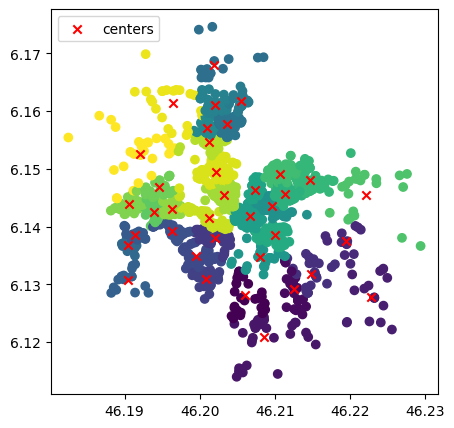

In [97]:
plt.figure(figsize=(5,5))
plt.scatter(df_rest_dist2["geometry.location.lat"],df_rest_dist2["geometry.location.lng"], c=df_rest_dist2["district_cluster"])
plt.scatter(cluster_centers['cluster_center_lat'],cluster_centers['cluster_center_lng'], c='r', marker='x', label='centers')
#plt.scatter(rest_grid_points[max_indices][:,0],rest_grid_points[max_indices][:,1],c='black')
plt.legend(loc='upper left')
plt.show()

In [98]:
df_rest_dist2.groupby(['district','district_cluster'])['place_id'].count()

district                 district_cluster
Bâtie - Acacias          11                  19
                         12                  15
                         13                  14
Champel                  36                  24
                         37                  31
Cité-Centre              32                  89
                         33                  47
                         34                  55
                         35                  86
Eaux-Vives - Lac         14                  19
                         15                  69
                         16                  20
                         17                  40
                         18                  40
Grottes Saint-Gervais    19                  74
                         20                  29
                         21                  64
                         22                  40
                         23                  45
Jonction - Plainpalais   7                   5

In [101]:
df_rest_dist2.to_csv('../data/data_combined_v1.04.csv', encoding='utf-8-sig', index=False)
cluster_centers.to_csv('../data/data_cluster_centers_v1.02.csv', encoding='utf-8-sig', index=False)